In [1]:
import os

import skimage.io as io
from skimage.color import rgb2grey
import matplotlib.pyplot as plt
import skimage.util as u
import numpy as np

In [2]:
"""
Hyperparameters that are magnification-dependent:
- hough_radii => size of hough circles for FOV 
- crop region around hough_circle center
- crop region about center of image (if not using hough circle)
- region_prop.area -- is in pixels?
- 

"""

def plot_large(arr, x, y):
    figure = plt.figure(figsize=(x,y))
    ax = figure.add_subplot(111)
    ax.imshow(arr)

In [3]:

# path_to_cells = '../Plates_given_to_manu/2020-01-15_plate4_AEP_Feb3_6mousesera'
path_to_cells = '/Users/bryant.chhun/PycharmProjects/array-imager/Plates_given_to_manu/2020-01-15_plate4_AEP_Feb3_6mousesera'
images = [file for file in os.listdir(path_to_cells) if '.png' in file]

In [4]:
images[0]

'C8.png'

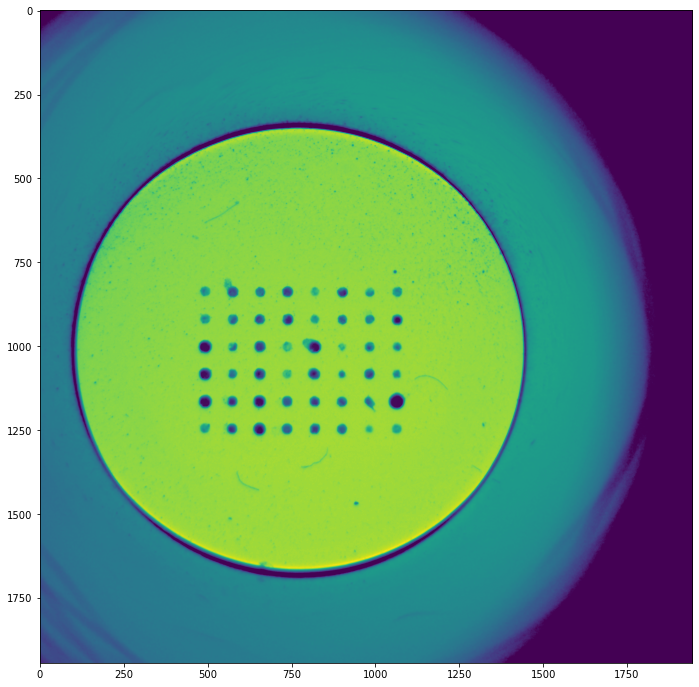

In [5]:
# im = io.imread(path_to_cells+os.sep+images[0])

im = io.imread(path_to_cells+os.sep+'A1.png')

image = rgb2grey(im)
plot_large(image, 12,12)

In [6]:
from skimage.filters import threshold_minimum
from copy import deepcopy

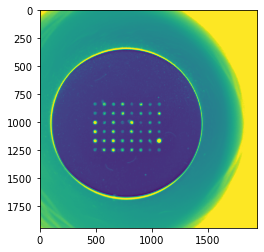

In [7]:
inv = u.invert(image)
plt.imshow(inv)

In [8]:
thresh = threshold_minimum(inv)
thresh

0.4919314284620098

(array([5.00000e+00, 8.00000e+00, 2.40000e+01, 4.90000e+01, 8.00000e+01,
        1.11000e+02, 1.39000e+02, 1.91000e+02, 1.88000e+02, 1.90000e+02,
        2.44000e+02, 2.84000e+02, 2.73000e+02, 3.20000e+02, 3.35000e+02,
        4.31000e+02, 4.43000e+02, 4.96000e+02, 5.34000e+02, 5.61000e+02,
        5.75000e+02, 6.95000e+02, 6.19000e+02, 7.07000e+02, 7.53000e+02,
        9.94000e+02, 1.11400e+03, 1.42100e+03, 1.70900e+03, 1.77700e+03,
        2.59900e+03, 3.02900e+03, 4.77400e+03, 9.58500e+03, 1.89200e+04,
        4.78180e+04, 7.63340e+04, 1.09810e+05, 1.08063e+05, 8.65440e+04,
        8.51260e+04, 7.99350e+04, 8.67330e+04, 8.16310e+04, 8.09740e+04,
        7.81230e+04, 6.15290e+04, 6.70180e+04, 5.05580e+04, 3.98440e+04,
        2.99450e+04, 1.87980e+04, 1.59560e+04, 1.23890e+04, 1.06990e+04,
        8.70200e+03, 6.31700e+03, 5.78000e+03, 4.31300e+03, 4.18300e+03,
        3.73500e+03, 3.07000e+03, 2.85800e+03, 2.02200e+03, 2.04300e+03,
        1.84600e+03, 1.62500e+03, 1.58100e+03, 1.28

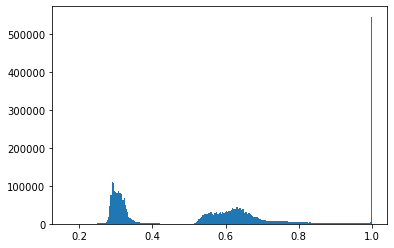

In [9]:
plt.hist(inv.ravel(), bins=256)


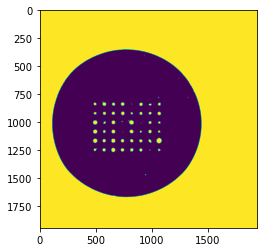

In [10]:
binary = deepcopy(inv)
binary[inv<thresh] = 0
binary[inv>=thresh] = 1

plt.imshow(binary)


In [11]:
"""
try hough circle first
"""
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter

In [12]:
edges = canny(binary, sigma=3)

In [13]:
# set hough_radii based on the magnification of detection
hough_radii = [300, 400, 500, 600]
hough_res = hough_circle(edges, hough_radii)

hough_res

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [14]:
aaccums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1)


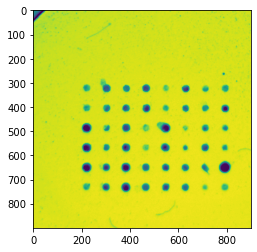

In [19]:
# crop smaller than radus based on magnification of detection
crop = image[cy[0]-(radii[0]-150):cy[0]+(radii[0]-150), cx[0]-(radii[0]-150):cx[0]+(radii[0]-150)]
#
plt.imshow(crop)

In [56]:
# 'crop' is greyscale, 'crop_im' is RGB
crop_im = im[cy[0]-(radii[0]-200):cy[0]+(radii[0]-200), cx[0]-(radii[0]-200):cx[0]+(radii[0]-200)]

(array([1.1000e+01, 3.3000e+01, 2.0700e+02, 8.8700e+02, 2.5720e+03,
        7.5500e+03, 2.2754e+04, 3.9219e+04, 4.3465e+04, 5.2669e+04,
        5.3705e+04, 4.8024e+04, 4.0927e+04, 4.9944e+04, 5.2193e+04,
        5.1446e+04, 4.5616e+04, 5.1867e+04, 4.2747e+04, 3.6741e+04,
        2.7184e+04, 2.2732e+04, 1.5213e+04, 1.1317e+04, 8.0680e+03,
        7.0540e+03, 5.2210e+03, 4.2170e+03, 3.6790e+03, 3.2120e+03,
        2.6420e+03, 2.0860e+03, 1.8100e+03, 1.5260e+03, 1.3730e+03,
        1.1080e+03, 1.0110e+03, 9.3600e+02, 7.9300e+02, 6.8800e+02,
        6.8100e+02, 6.6100e+02, 6.0800e+02, 5.5900e+02, 5.2600e+02,
        4.7600e+02, 4.6200e+02, 4.8800e+02, 4.1800e+02, 4.4300e+02,
        4.2800e+02, 3.7400e+02, 3.9700e+02, 4.3400e+02, 3.9100e+02,
        3.5700e+02, 3.4800e+02, 3.8700e+02, 3.9700e+02, 3.6900e+02,
        3.4000e+02, 3.7000e+02, 3.3200e+02, 3.0500e+02, 3.3300e+02,
        3.6800e+02, 3.5300e+02, 3.1500e+02, 3.4200e+02, 3.1300e+02,
        2.7500e+02, 3.1500e+02, 2.9100e+02, 3.11

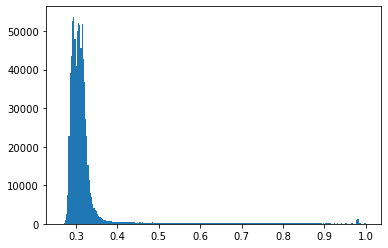

In [20]:
inv_crop = u.invert(crop)
plt.hist(inv_crop.ravel(), bins=256)

In [21]:
import numpy as np
from skimage.morphology import disk, ball, binary_opening, binary_erosion


def get_unimodal_threshold(input_image):
    """Determines optimal unimodal threshold

    https://users.cs.cf.ac.uk/Paul.Rosin/resources/papers/unimodal2.pdf
    https://www.mathworks.com/matlabcentral/fileexchange/45443-rosin-thresholding

    :param np.array input_image: generate mask for this image
    :return float best_threshold: optimal lower threshold for the foreground
     hist
    """

    hist_counts, bin_edges = np.histogram(
        input_image,
        bins=256,
        range=(input_image.min(), np.percentile(input_image, 99.5))
    )
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # assuming that background has the max count
    max_idx = np.argmax(hist_counts)
    int_with_max_count = bin_centers[max_idx]
    p1 = [int_with_max_count, hist_counts[max_idx]]

    # find last non-empty bin
    pos_counts_idx = np.where(hist_counts > 0)[0]
    last_binedge = pos_counts_idx[-1]
    p2 = [bin_centers[last_binedge], hist_counts[last_binedge]]

    best_threshold = -np.inf
    max_dist = -np.inf
    for idx in range(max_idx, last_binedge, 1):
        x0 = bin_centers[idx]
        y0 = hist_counts[idx]
        a = [p1[0] - p2[0], p1[1] - p2[1]]
        b = [x0 - p2[0], y0 - p2[1]]
        cross_ab = a[0] * b[1] - b[0] * a[1]
        per_dist = np.linalg.norm(cross_ab) / np.linalg.norm(a)
        if per_dist > max_dist:
            best_threshold = x0
            max_dist = per_dist
    assert best_threshold > -np.inf, 'Error in unimodal thresholding'
    return best_threshold


def create_unimodal_mask(input_image, str_elem_size=3):
    """Create a mask with unimodal thresholding and morphological operations

    unimodal thresholding seems to oversegment, erode it by a fraction

    :param np.array input_image: generate masks from this image
    :param int str_elem_size: size of the structuring element. typically 3, 5
    :return: mask of input_image, np.array
    """

    if np.min(input_image) == np.max(input_image):
        thr = np.unique(input_image)
    else:
        thr = get_unimodal_threshold(input_image)
    if len(input_image.shape) == 2:
        str_elem = disk(str_elem_size)
    else:
        str_elem = ball(str_elem_size)
    # remove small objects in mask
    thr_image = binary_opening(input_image > thr, str_elem)
    mask = binary_erosion(thr_image, str_elem)
    return mask

In [22]:
"""
Here we can try playing with a few thresholds to properly ID the spots

"""
t = threshold_minimum(inv_crop)
t

uni_t = get_unimodal_threshold(inv_crop)
(t, uni_t)

(0.8347799862132352, 0.3545222977941176)

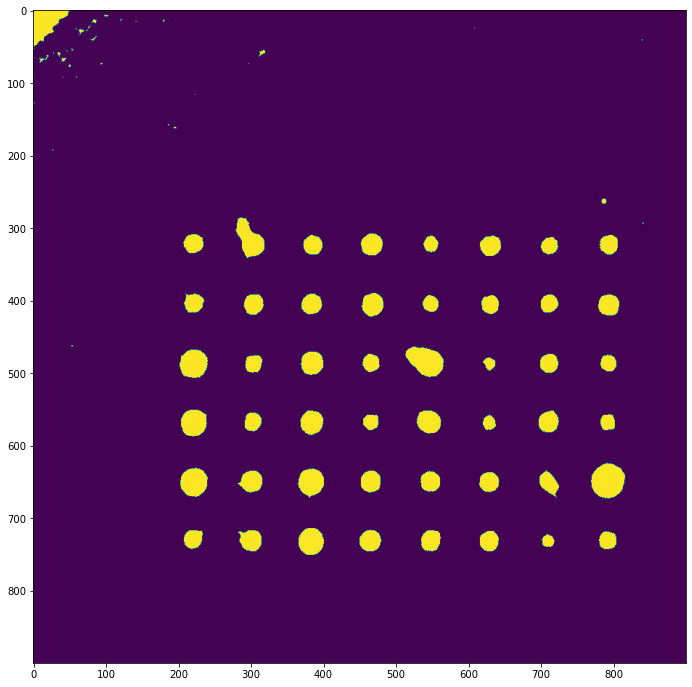

In [23]:
"""
The create_unimodal_mask does cleanup like below
"""
uni_mask = create_unimodal_mask(inv_crop)

plot_large(uni_mask, 12, 12)

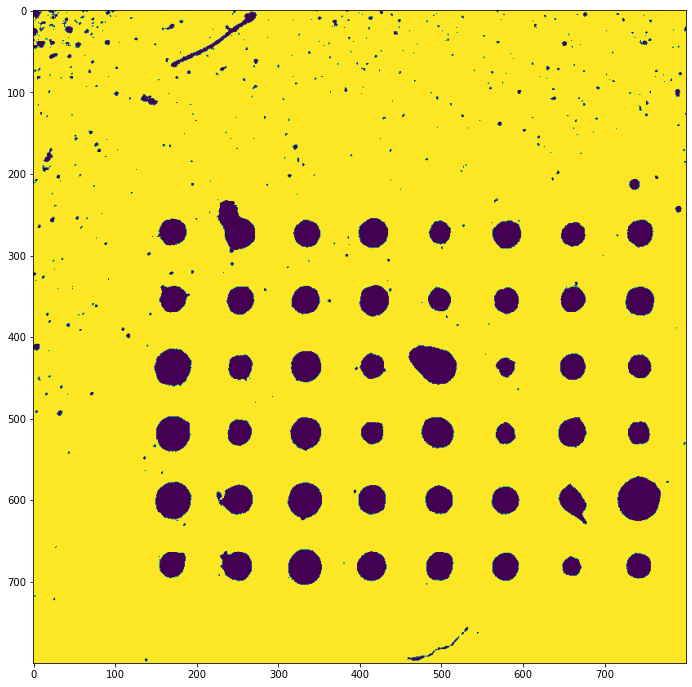

In [64]:

out_binary = inv_crop < uni_t
plot_large(out_binary, 12,12)

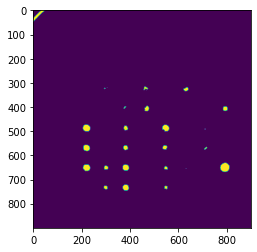

In [24]:
from copy import copy
inv_crop_binary = copy(inv_crop)
inv_crop_binary[inv_crop_binary<t] = 0
inv_crop_binary[inv_crop_binary>=t] = 1

plt.imshow(inv_crop_binary)

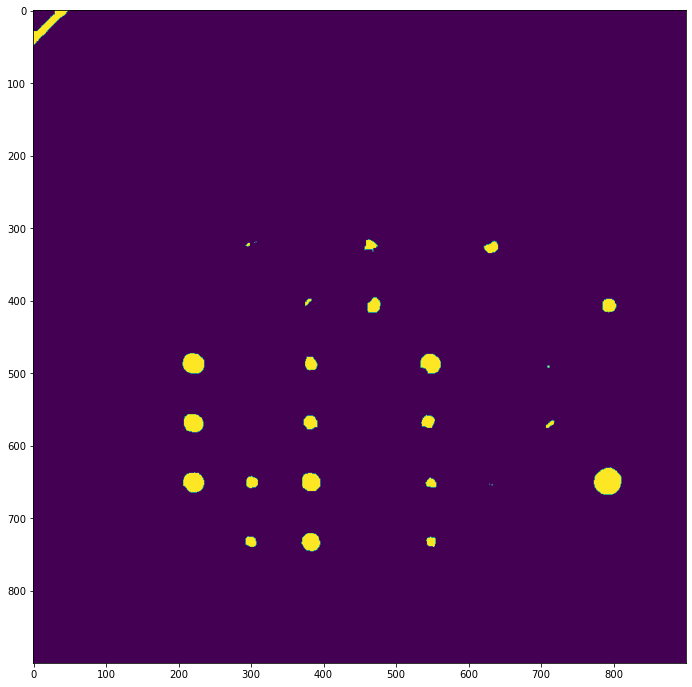

In [25]:
# from scipy.ndimage.morphology import binary_closing
# inv_crop_binary_closed = binary_closing(inv_crop_binary, structure=np.ones((10,10)))

from skimage.morphology import binary_closing
inv_crop_binary_closed = binary_closing(inv_crop_binary, selem=np.ones((10,10)))


figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(111)
ax.imshow(inv_crop_binary_closed)

In [26]:
from skimage import measure

# labels = measure.label(inv_crop_binary_closed)
labels = measure.label(uni_mask)

((258, 157, 286, 185), (341, 158, 368, 186))

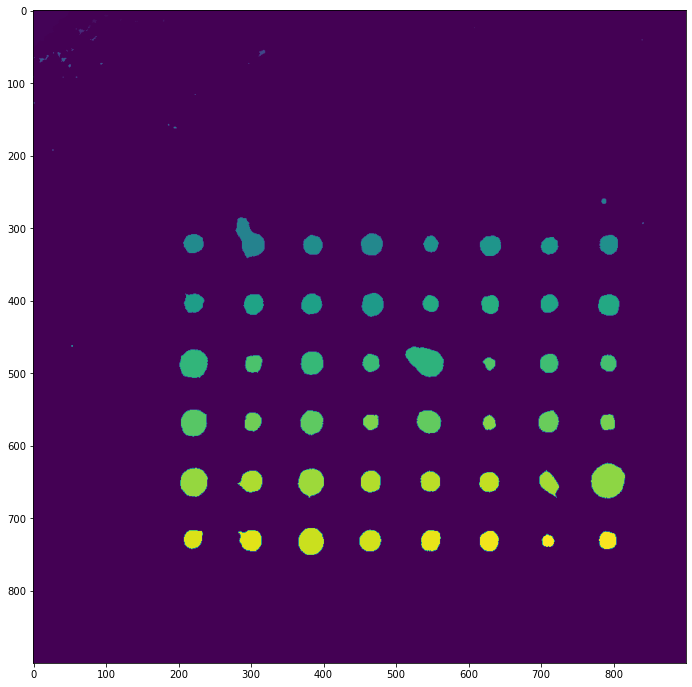

In [27]:

plot_large(labels, 12, 12)
((258, 157, 286, 185), (341, 158, 368, 186))

In [31]:
props = measure.regionprops(labels, intensity_image=crop)
props = [p for p in props if p.eccentricity <0.5]
# props = measure.regionprops(labels, intensity_image=crop_im)

In [32]:
c=0
for prop in props:
    if prop.area > 150:
        print(f"{prop.area} c = {prop.centroid}")
        c+=1
print(c)


720 c = (322.725, 466.5541666666667)
568 c = (321.3978873239437, 220.8767605633803)
564 c = (323.5177304964539, 385.322695035461)
543 c = (322.77348066298345, 793.4640883977901)
349 c = (322.0916905444126, 548.0143266475644)
646 c = (324.4798761609907, 630.2151702786377)
432 c = (324.4513888888889, 711.5324074074074)
758 c = (405.56992084432716, 467.71767810026387)
560 c = (403.38928571428573, 221.1642857142857)
635 c = (404.80787401574804, 383.60944881889765)
612 c = (405.0735294117647, 303.7238562091503)
482 c = (404.1410788381743, 711.0082987551867)
691 c = (406.16931982633866, 793.2069464544139)
393 c = (404.2620865139949, 547.70737913486)
499 c = (405.4428857715431, 629.7154308617235)
1209 c = (487.110835401158, 220.98924731182797)
804 c = (486.14179104477614, 384.2226368159204)
452 c = (485.9424778761062, 465.4579646017699)
533 c = (486.5497185741088, 710.9155722326454)
404 c = (486.2252475247525, 792.7029702970297)
462 c = (487.0238095238095, 303.6320346320346)
1068 c = (568.461

In [66]:
"""
1) create a map of region props to cell positions
2) using centroid, do some sorting so it's in row-column order
3) then make assignments

- no, need to do direct position to centroid mapping
- do a simple min distance func to array position
- map all centroids onto an array of a certain shape 
    --> divide centroid positions by the image area in pixels
    --> cast to int, then do assignment and check for collisions

"""

"\n1) create a map of region props to cell positions\n2) using centroid, do some sorting so it's in row-column order\n3) then make assignments\n\n- no, need to do direct position to centroid mapping\n- do a simple min distance func to array position\n- map all centroids onto an array of a certain shape \n    --> divide centroid positions by the image area in pixels\n    --> cast to int, then do assignment and check for collisions\n\n"

In [33]:
"""
Creates a dictionary whose keys are (centroid_x, centroid_y) scaled to int
    and whose values are region_prop objects
"""
(x, y) = inv_crop_binary.shape
c = 0
# find minx, miny to "zero center" the array
minx = x
miny = y
# find maxx, maxy to scale to array index values
maxx = 0
maxy = 0
for prop in props:
    if prop.area > 100:
        if prop.centroid[0] < minx:
            minx = prop.centroid[0]
        if prop.centroid[1] < miny:
            miny = prop.centroid[1]
        if prop.centroid[0] > maxx:
            maxx = prop.centroid[0]
        if prop.centroid[1] > maxy:
            maxy = prop.centroid[1]
        
print((minx, miny, maxx, maxy))

# use centroid positions to map prop to array index values
chk_list = []
cent_map = {}
for prop in props:
    if prop.area > 100:
        cx, cy = prop.centroid
        csx = cx-minx
        csy = cy-miny
        
        smaxx = maxx-minx
        smaxy = maxy-miny
        
        # "zero center"
        # scale by number of pixels
        # mutiply by number of wells
        norm_cent_x = int(round(5*(csx/smaxx)))
        norm_cent_y = int(round(7*(csy/smaxy)))
        
        print(f"\ncentroid = {prop.centroid}\n\tnorm_cent = {norm_cent_x, norm_cent_y}")
        
        chk_list.append((norm_cent_x, norm_cent_y))
        cent_map[(norm_cent_x, norm_cent_y)] = prop
        c+=1
print(c)

# check if all keys (coordinates) are unique.
if len(chk_list) != len(set(chk_list)):
    print("ERROR, DUPLICATE ENTRIES")


(321.3978873239437, 220.37546468401487, 732.0344497607656, 793.4640883977901)

centroid = (322.725, 466.5541666666667)
	norm_cent = (0, 3)

centroid = (321.3978873239437, 220.8767605633803)
	norm_cent = (0, 0)

centroid = (323.5177304964539, 385.322695035461)
	norm_cent = (0, 2)

centroid = (322.77348066298345, 793.4640883977901)
	norm_cent = (0, 7)

centroid = (322.0916905444126, 548.0143266475644)
	norm_cent = (0, 4)

centroid = (324.4798761609907, 630.2151702786377)
	norm_cent = (0, 5)

centroid = (324.4513888888889, 711.5324074074074)
	norm_cent = (0, 6)

centroid = (405.56992084432716, 467.71767810026387)
	norm_cent = (1, 3)

centroid = (403.38928571428573, 221.1642857142857)
	norm_cent = (1, 0)

centroid = (404.80787401574804, 383.60944881889765)
	norm_cent = (1, 2)

centroid = (405.0735294117647, 303.7238562091503)
	norm_cent = (1, 1)

centroid = (404.1410788381743, 711.0082987551867)
	norm_cent = (1, 6)

centroid = (406.16931982633866, 793.2069464544139)
	norm_cent = (1, 7)

ce

In [34]:
len(chk_list), len(set(chk_list))

(43, 43)

In [35]:
list(cent_map.items())[0][1]

In [36]:
"""
try inserting the props into the array
"""

image_array = np.empty(shape=(6, 8), dtype=object)
for key, value in cent_map.items():
    image_array[key[0],key[1]] = value

In [74]:
f = image_array.flatten()
d = [k.intensity_image if k is not None else None for k in f]
mean_int_array = np.array(d)
np.reshape(mean_int_array, image_array.shape)

array([[array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.53147333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5283851 , 0.51915804, 0.50879216, 0.50543608,
        0.49870902, 0.49815843, 0.51019098, 0.53596039, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.53677882, 0.53060235, 0.51353216, 0.51690314,
        0.51326431, 0.50094902, 0.4897498 , 0.48218941, 0.47407843,
        0.4634298 

In [79]:
# (min_row, min_col, max_row, max_col)
(image_array[0][0].bbox, image_array[1][0].bbox)

((258, 157, 286, 185), (341, 158, 368, 186))

In [44]:
target = np.zeros(shape=uni_mask.shape)

In [56]:
# (min_row, min_col, max_row, max_col)
def assign_region(target_, props_):
    min_row, min_col, max_row, max_col = props_.bbox
    target_[min_row:max_row, min_col:max_col] = props_.intensity_image
    return target_

for row in range(image_array.shape[0]):
    for col in range(image_array.shape[1]):
        props = image_array[row, col]
        if props is not None:
            target = assign_region(target, props)

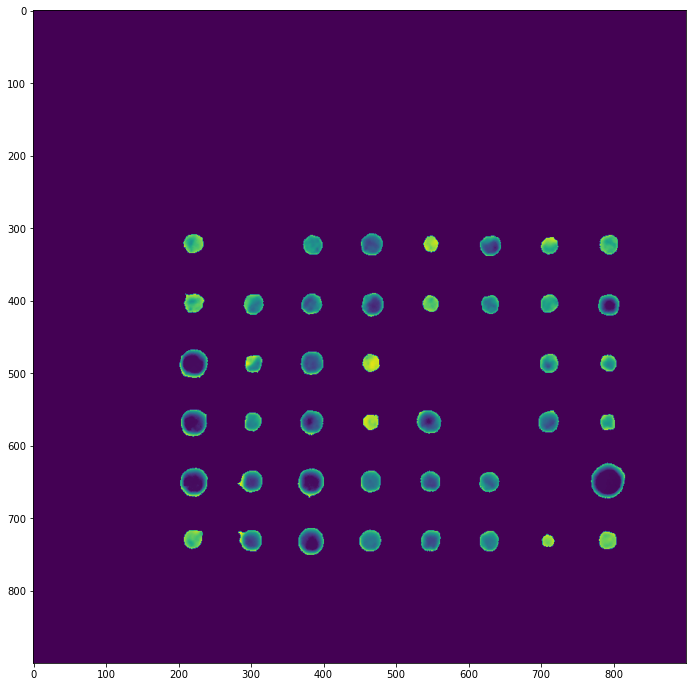

In [58]:
plot_large(target, 12, 12)

In [61]:
target.max(), target.min()

(0.6286117647058824, 0.0)

In [65]:
(255*target).astype('uint8').min()

0